In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy 
from tensorflow.keras.activations import sigmoid


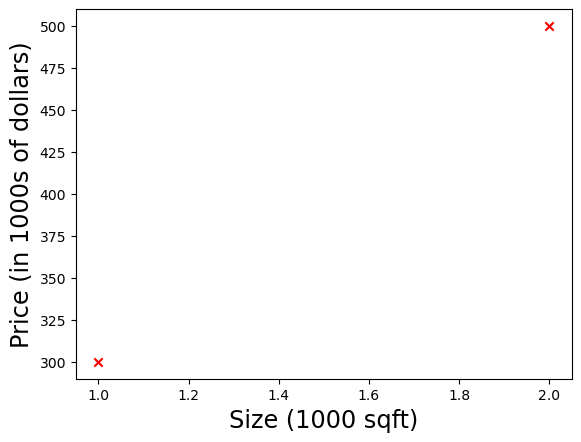

In [8]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

#### Using TF & Keras to define a linear layer with one unit

In [9]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

**Code Explaination**

1. `tf.keras.layers.Dense`  
	•	Dense is a type of layer in a neural network where each neuron is connected to every neuron in the previous layer (hence the name “dense”).
	•	It is used to implement fully connected layers, which are the most common type of layers in neural networks.

2. `units=1`  
	•	The units parameter specifies the number of neurons (or units) in the layer.
	•	In this case, units=1 means the layer will have one neuron. This is typical for tasks where you are predicting a single value, such as in regression tasks.

3. `activation='linear'`  
	•	The activation function determines the output transformation applied to the weighted sum of the input.  
	•	***`'linear'` is the identity function, meaning that the output of this layer will be a linear combination of the inputs. No transformation is applied to the output, so the layer simply outputs a weighted sum of its inputs plus a bias term.***  
	•	In contrast, other activation functions like 'relu', 'sigmoid', or 'softmax' apply non-linear transformations.  


In [12]:
# get the weights of the linear model
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let us try the model on one example of the `X_train`. This will trigger the instantiation of the weights.   
***Note: The input to the layer must be 2D***

In [15]:
a1 = linear_layer(X_train[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.6193235]], dtype=float32)>

**What is happening in the above code**

**Forward Pass:** The linear_layer performs a computation using the initial randomly assigned weights and bias. Since the weights and bias are initialized randomly at the start (unless you have a specific initialization), the output at this point will be based on these random parameters. It doesn’t yet reflect the “learned” values.

In [19]:
## randomly assigned weight and bias during forward pass.
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-0.6193235]], b=[0.]


**Let us assign W and b to known value rather than random ones**



In [20]:
set_w = np.array([[2000]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[2000.]], dtype=float32), array([100.], dtype=float32)]


In [22]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

alin_custom = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin_custom)

tf.Tensor([[2100.]], shape=(1, 1), dtype=float32)
[[2100.]]


In [37]:
prediction_tf = linear_layer(X_train)
prediction_alin_custom = np.dot(X_train, set_w) + set_b

In [38]:
prediction_tf

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2100.],
       [4100.]], dtype=float32)>

In [39]:
prediction_alin_custom

array([[2100.],
       [4100.]])

## Neuron with sigmoid activation

The function implemented by a neuron/unit with a sigmoid activation is:
$$ f_{\mathbf{w},b}(x^{(i)}) = g(\mathbf{w}x^{(i)} + b) \tag{2}$$
where $$g(x) = sigmoid(x)$$ 

Let's set $w$ and $b$ to some known values and check the model.


In [43]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [44]:
pos = Y_train == 1
neg = Y_train == 0

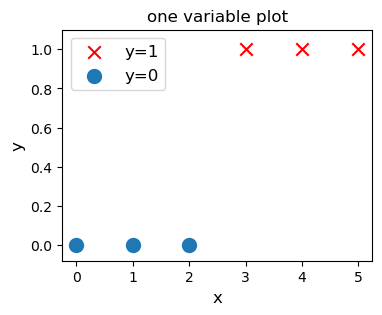

In [48]:
fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", )

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

## Implementing logistic Layer

We can implement logistic neuron by adding a sigmoid activation. 



In [50]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

1. `Sequential():`
	•	Sequential is a linear stack of layers, meaning the layers are stacked one after another, where each layer’s output is the next layer’s input.
	•	It is the most common way of building models in Keras, especially for simple feedforward neural networks.

2. `tf.keras.layers.Dense():`
	•	This is a fully connected (dense) layer in the neural network.  
	•	The Dense layer is the most common layer used in neural networks, where each neuron in the layer is connected to every neuron in the previous layer.  
Arguments for `Dense(1, input_dim=1, activation='sigmoid', name='L1'):`
	•	1: This specifies that the dense layer has 1 output neuron. This would be suitable for a binary classification task, as you typically have one output unit with a sigmoid activation function.  
	•	input_dim=1: This specifies the number of input features to the model. Here, it is set to 1, meaning the input data will have a single feature (e.g., a single value for each sample).  
	•	activation='sigmoid': This defines the activation function for the neurons in this layer. The sigmoid activation function outputs values between 0 and 1, which is commonly used for binary classification tasks because it can be interpreted as a probability.  
	•	name='L1': This is the name assigned to this layer. It’s useful for debugging or when accessing specific layers later.  

3. Putting it all together:  

The model consists of one dense layer with:  
	•	1 output neuron (for binary output),  
	•	1 input feature,  
	•	a sigmoid activation function to map the output between 0 and 1 (ideal for binary classification),   
	•	and the layer is named L1.  

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [56]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-0.4273523]] [0.]
(1, 1) (1,)


Like before, setting weights and biases to some known value

In [57]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [61]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = 1/(1+np.exp(-(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)))
print(alog)

1/1 [==============================] - 0s 11ms/step
[[0.01098694]]
[[0.01098694]]


### We built very simple neural network